In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [21]:
df = pd.read_csv('tc_bmi.csv')
df.head()

,ID,TC,BMI,BMI_cat,Obese
0,1,158.0,20.2,Normal,0
1,2,181.0,21.7,Normal,0
2,3,192.0,22.0,Normal,0
3,4,164.0,22.8,Normal,0
4,5,201.5,24.6,Normal,0


In [22]:
X = df.BMI.as_matrix().reshape(20,1)
y = df.TC

/Users/chyld/.conda/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [23]:
model = LinearRegression().fit(X,y)

In [24]:
model.intercept_

29.267587415792008

In [25]:
model.coef_

array([6.45096467])

In [26]:
# equation
# y = 6.45096467 * BMI + 29.267587415792008

In [27]:
y_hat = model.predict(X)

In [28]:
nn = Sequential()

In [29]:
nn.add(Dense(units=1, activation='linear', input_shape=(1,)))

In [30]:
sgd = optimizers.SGD(lr=0.001)

In [31]:
nn.compile(loss='mse', optimizer=sgd, metrics=['mse'])

In [32]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = nn.fit(X, y, epochs=20, batch_size=10, verbose=2)

Epoch 1/20
20/20 - 0s - loss: 23090.0576 - mse: 23090.0566
Epoch 2/20
20/20 - 0s - loss: 3626.7866 - mse: 3626.7866
Epoch 3/20
20/20 - 0s - loss: 1692.4845 - mse: 1692.4846
Epoch 4/20
20/20 - 0s - loss: 464.5069 - mse: 464.5069
Epoch 5/20
20/20 - 0s - loss: 402.3943 - mse: 402.3943
Epoch 6/20
20/20 - 0s - loss: 443.0750 - mse: 443.0750
Epoch 7/20
20/20 - 0s - loss: 395.9803 - mse: 395.9803
Epoch 8/20
20/20 - 0s - loss: 517.4754 - mse: 517.4754
Epoch 9/20
20/20 - 0s - loss: 621.3455 - mse: 621.3455
Epoch 10/20
20/20 - 0s - loss: 417.8824 - mse: 417.8824
Epoch 11/20
20/20 - 0s - loss: 703.7880 - mse: 703.7880
Epoch 12/20
20/20 - 0s - loss: 421.1175 - mse: 421.1174
Epoch 13/20
20/20 - 0s - loss: 532.9635 - mse: 532.9635
Epoch 14/20
20/20 - 0s - loss: 394.3134 - mse: 394.3134
Epoch 15/20
20/20 - 0s - loss: 384.0554 - mse: 384.0554
Epoch 16/20
20/20 - 0s - loss: 404.6887 - mse: 404.6887
Epoch 17/20
20/20 - 0s - loss: 453.8384 - mse: 453.8384
Epoch 18/20
20/20 - 0s - loss: 405.7852 - mse: 40

In [34]:
nn_pred = nn.predict(X)

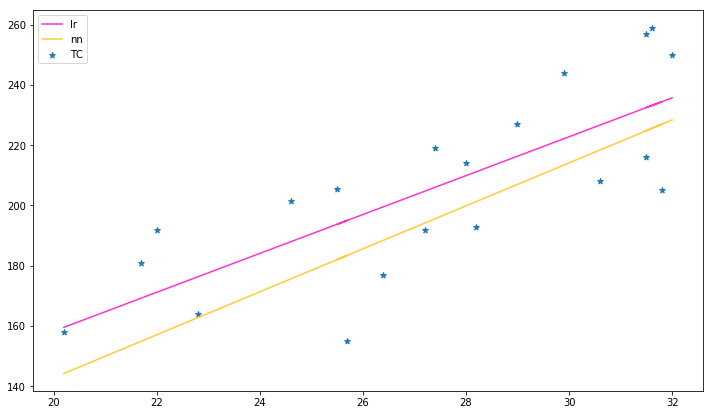

In [35]:
plt.figure(figsize=(12,7))
plt.scatter(X, y, marker='*')
plt.plot(X, y_hat, label='lr', color='#ff33cc')
plt.plot(X, nn_pred, label='nn', color='#ffcc33')
plt.legend()
plt.show()

In [36]:
history.history

{'loss': [23090.0576171875,
  3626.78662109375,
  1692.4844970703125,
  464.50694274902344,
  402.39434814453125,
  443.0749969482422,
  395.9803161621094,
  517.4753875732422,
  621.3454742431641,
  417.88238525390625,
  703.7879638671875,
  421.1174545288086,
  532.9635162353516,
  394.3134002685547,
  384.055419921875,
  404.6886901855469,
  453.8384094238281,
  405.78517150878906,
  386.6622314453125,
  461.8424377441406],
 'mse': [23090.057,
  3626.7866,
  1692.4846,
  464.50693,
  402.39435,
  443.075,
  395.98032,
  517.4754,
  621.3455,
  417.8824,
  703.78796,
  421.11743,
  532.9635,
  394.31342,
  384.05542,
  404.68866,
  453.83838,
  405.7852,
  386.66223,
  461.84244]}

In [37]:
history.model.get_weights()

[array([[7.1291323]], dtype=float32), array([0.24992175], dtype=float32)]